In [35]:
# Math, Plotting, and Data Frames
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
# Models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Metrics and Scoring
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
df.isnull().sum().max()

0

Good, there are no null values. <br>
All 31 columns are numerical. <br>
According to the documentation V1-V28 are PCA created features to protect customer privacy. <br>
Time is the number of seconds elapsed between this transaction and the first transaction in the dataset. <br>
Amount is transaction amount. <br>
Class is whether the transaction is fraudulent (1) or normal (0)

Text(0.5,1,'0: No Fraud || 1: Fraud')

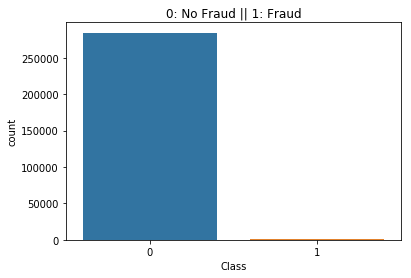

In [4]:
sns.countplot('Class', data=df)
plt.title('0: No Fraud || 1: Fraud')

In [5]:
# The classes are heavily skewed, which needs to be addressed before modeling
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('Total Frauds', df['Class'].value_counts()[1])

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Total Frauds 492


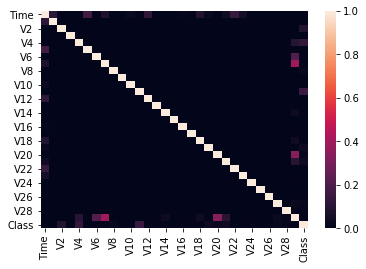

In [6]:
# Looking at correlation in an unbalanced datset
sns.heatmap(df.corr(), vmin=0, vmax=1)

I'm going to subsample the data set to bring balance and to not overfit on non-fraudulent data. The subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. <br>
There's very little to no correlation to the fraudulent class or among the variables.

In [7]:
# Shuffle data before sub-sampling
df = df.sample(frac=1)

# Create equal sized classes (492)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

total_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle the new data frame rows
bal_df = total_df.sample(frac=1, random_state=42)

bal_df.shape

(984, 31)

Text(0.5,1,'0: No Fraud || 1: Fraud')

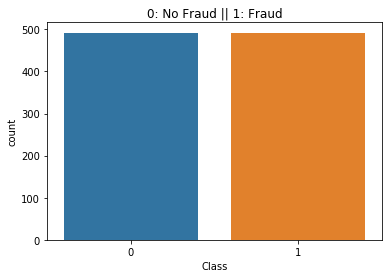

In [8]:
sns.countplot('Class', data=bal_df)
plt.title('0: No Fraud || 1: Fraud')

Now the fraudulent and non-fraudulent classes are equal (balanced dataset). I'll clean up outliers, and classify on this subset, then use the best model from the subset on the full set of data.

In [9]:
# V!-V28 is data that has been scaled and trasformed using PCA (supposedly) for customer confidentiality.
# Time and Amount should be scaled as well

from sklearn.preprocessing import RobustScaler
# RobustScaler is less prone to outliers than StandardScaler

rob_scale = RobustScaler()

bal_df['scaled_amount'] = rob_scale.fit_transform(bal_df['Amount'].values.reshape(-1,1))
bal_df['scaled_time'] = rob_scale.fit_transform(bal_df['Time'].values.reshape(-1,1))

bal_df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [10]:
# move the scaled amount and sclaed time columns to the first two columns
s_amount = bal_df['scaled_amount']
s_time = bal_df['scaled_time']

bal_df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
bal_df.insert(0, 'scaled_amount', s_amount)
bal_df.insert(1, 'scaled_time', s_time)

bal_df.head(2)

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
151102,-0.054097,0.182822,-0.106505,1.006714,-1.660144,-1.401155,3.102212,3.275197,0.309256,0.842021,...,0.132448,-0.516440,-1.113888,0.140804,0.528198,-0.394148,0.130318,0.329385,0.121720,0
106679,2.113826,-0.104352,-0.440095,1.137239,-3.227080,3.242293,-2.033998,-1.618415,-3.028013,0.764555,...,0.895841,0.764187,-0.275578,-0.343572,0.233085,0.606434,-0.315433,0.768291,0.459623,1


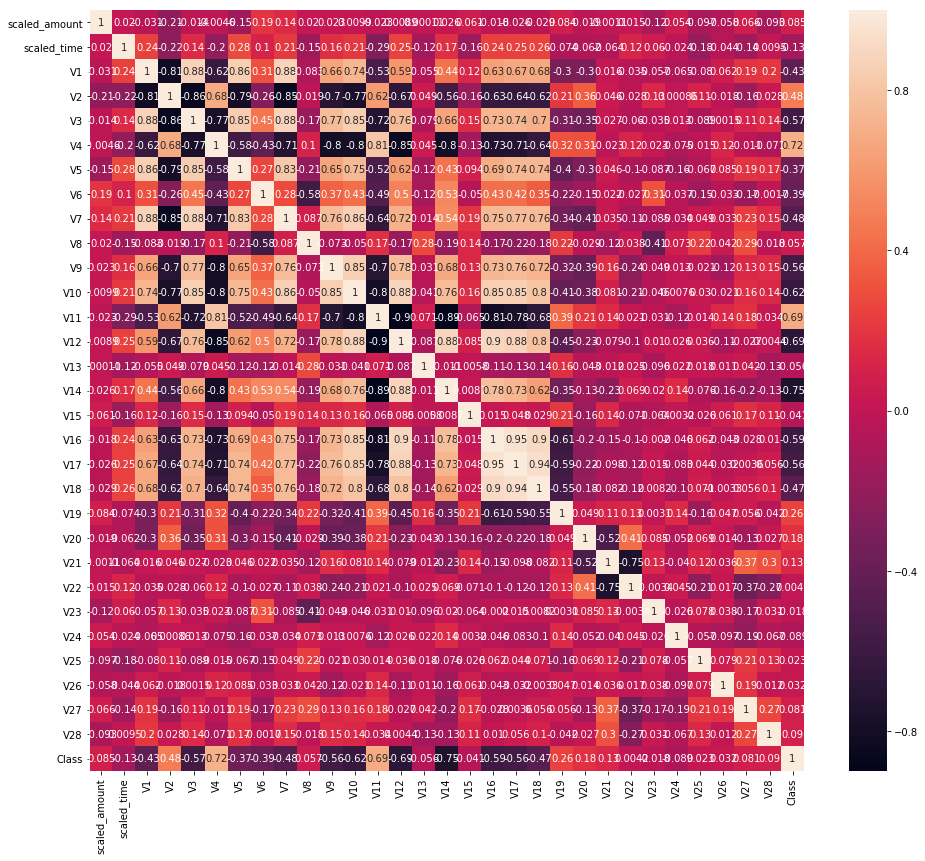

In [11]:
fig, ax = plt.subplots(figsize=(16,14)) 
sns.heatmap(bal_df.corr(), annot=True, ax=ax)

The balanced data now shows that about half of the data is correlated to a fraudulent prediction, and correleated amongst the other features.

In [12]:
bal_df.corr()['Class'].sort_values(ascending=False)

Class            1.000000
V4               0.715748
V11              0.686894
V2               0.484273
V19              0.257462
V20              0.183372
V21              0.131440
V28              0.090247
scaled_amount    0.084577
V27              0.081026
V8               0.057059
V26              0.032095
V25              0.022885
V22              0.004193
V23             -0.018464
V15             -0.041244
V13             -0.056287
V24             -0.088616
scaled_time     -0.134974
V5              -0.372356
V6              -0.390328
V1              -0.428413
V18             -0.465853
V7              -0.477306
V9              -0.559026
V17             -0.560122
V3              -0.566919
V16             -0.593690
V10             -0.624874
V12             -0.686806
V14             -0.749277
Name: Class, dtype: float64

From the heatmap we can see that there is high correlation between V16, V17, and V18, and they seem to correlate with most features as well. So they may need to engineered into a single new feature.<br>
As far as features being correlated to predicting fraudulence, V4 and V11 have high positive correlations, V2 is moderately correlated, <br> and V16, V10, V12, and V14 are negatively correlated to fraudulence (as they decrease, the ability to predict fraudulence increases).

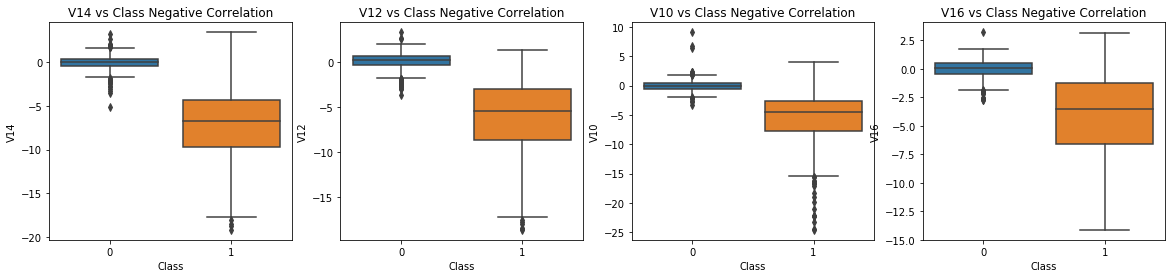

In [13]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V14", data=bal_df, ax=axes[0])
axes[0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=bal_df, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=bal_df, ax=axes[2])
axes[2].set_title('V10 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V16", data=bal_df, ax=axes[3])
axes[3].set_title('V16 vs Class Negative Correlation')

plt.show()

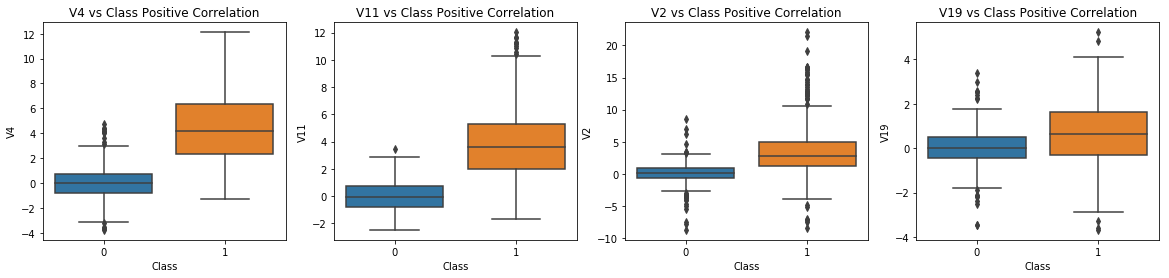

In [14]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V4", data=bal_df, ax=axes[0])
axes[0].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=bal_df, ax=axes[1])
axes[1].set_title('V11 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=bal_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=bal_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

The box plots give a visual representation of the high correlation between these 8 features and our target class, fraudulence. <br> 
They also show outliers of highly correlated features, which needs to be addressed to give a better prediction.

### remove outliers
### run models without adjusting parameters for each model
### show accuracy scores
### run models with parameters adjusted
### show scores

In [15]:
# To help reduce noise in the training data, we'll get rid of these known outliers in
# features that are highly correlated to our target (Fraudulence)

# winsorize to remove extreme outliers from highly correlated features 
import scipy.stats
bal_df['V14_wins'] = scipy.stats.mstats.winsorize(bal_df['V14'], limits= [0.05, 0.05])
bal_df['V12_wins'] = scipy.stats.mstats.winsorize(bal_df['V12'], limits= [0.05, 0.05])
bal_df['V4_wins'] = scipy.stats.mstats.winsorize(bal_df['V4'], limits= [0.05, 0.05])
bal_df['V2_wins'] = scipy.stats.mstats.winsorize(bal_df['V2'], limits= [0.05, 0.05])

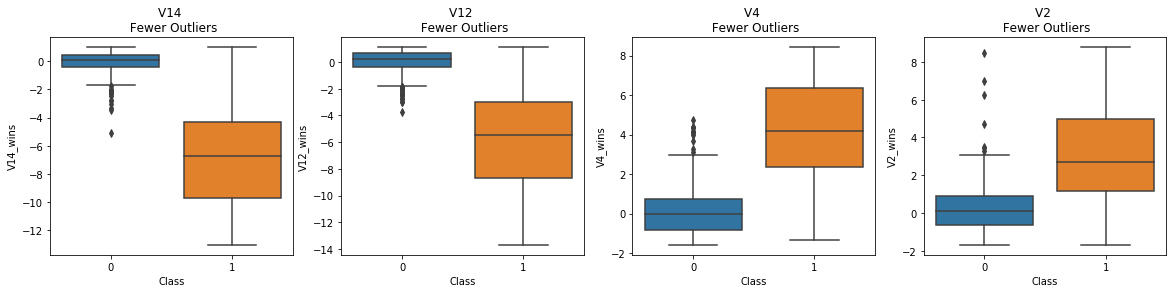

In [16]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Less outliers
sns.boxplot(x="Class", y="V14_wins", data=bal_df, ax=axes[0])
axes[0].set_title('V14 \n Fewer Outliers')

sns.boxplot(x="Class", y="V12_wins", data=bal_df, ax=axes[1])
axes[1].set_title('V12 \n Fewer Outliers')


sns.boxplot(x="Class", y="V4_wins", data=bal_df, ax=axes[2])
axes[2].set_title('V4 \n Fewer Outliers')


sns.boxplot(x="Class", y="V2_wins", data=bal_df, ax=axes[3])
axes[3].set_title('V2 \n Fewer Outliers')

plt.show()

In [17]:
# sns.lmplot('V4_wins', 'V11', bal_df, hue='Class', fit_reg=False)
# fig = plt.gcf()
# fig.set_size_inches(15, 10)
# plt.show()

# sns.pairplot(bal_df, hue='Class', size=3)

In [18]:
# Features and Target data
X = bal_df.drop('Class', axis=1)
y = bal_df['Class']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# I'll be using GridSearchCV to find the best classfier so I'll turn 
# the values into an array to feed into the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [20]:
# Implementing vanilla classifiers
#LogisiticRegression == LogR
#KNearest == KNN
#Support Vector Classifier == SVC
#DecisionTreeClassifier == DTC
classifiers = {
    "LogR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DTC": DecisionTreeClassifier()
}

/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

Classifiers:  LogisticRegression Has a 93.0 % training accuracy score
Classifiers:  KNeighborsClassifier Has a 92.0 % training accuracy score


/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classifiers:  SVC Has a 92.0 % training accuracy score
Classifiers:  DecisionTreeClassifier Has a 90.0 % training accuracy score


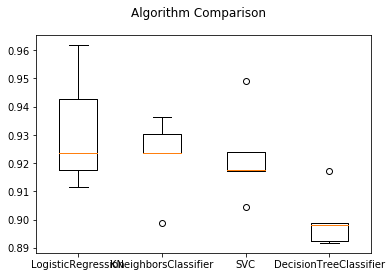

In [21]:
results = []
names = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    results.append(training_score)
    names.append(classifier.__class__.__name__)
    print("Classifiers: ", classifier.__class__.__name__, "Has a", 
          round(training_score.mean(), 2) * 100, "% training accuracy score")
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

__By visualizing that scores from each model, it's easy to see how well each performed overall. It's especially helpful to see the difference in performance between KNN and SVC.__ <br>

__I'm now going to run the models and various parameters utilizing GridSearchCV to see how their predictions actually perform__

In [22]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# GS logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": [2,3,4,5,7], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best parameters
knn = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 
              'gamma':[0.001, 0.01, 0.1, 1, 10]}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best parameters
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": [2,3,4], 
              "min_samples_leaf": [3,5,6,7]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best parameters
dtc = grid_tree.best_estimator_

print(log_reg, '\n LR best Score ', grid_log_reg.best_score_)
print(knn, '\n KNN best Score ', grid_knears.best_score_)
print(svc, '\n SVC best Score ', grid_svc.best_score_)
print(dtc, '\n DTC best Score ', grid_tree.best_score_)

/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn

/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 
 LR best Score  0.9377382465057179
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform') 
 KNN best Score  0.928843710292249
SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 SVC best Score  0.9351969504447268
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples

__By running vanilla models I recieved great accuracy from all of them, but because the Decision tree was less effective than the other's I'll get rid of it.__ <br>

__After running the models through gridsearch for the best parameters, it is interesting that Logistic regression, K Nearest Neighbors, and Support Vector Classifier all returned the same 'best score'.__

In [23]:
lr_pred = grid_log_reg.predict(X_test)
# Compute confusion matrix
labels = [0,1]
lr_cnf_matrix = confusion_matrix(y_test,lr_pred,labels)
np.set_printoptions(precision=2)

print(lr_cnf_matrix)

[[ 85   2]
 [  8 102]]


In [24]:
knn_pred = grid_knears.predict(X_test)
# Compute confusion matrix
labels = [0,1]
knn_cnf_matrix = confusion_matrix(y_test,knn_pred,labels)
np.set_printoptions(precision=2)

print(knn_cnf_matrix)

[[ 86   1]
 [  8 102]]


In [25]:
svc_pred = grid_svc.predict(X_test)
# Compute confusion matrix
labels = [0,1]
svc_cnf_matrix = confusion_matrix(y_test,svc_pred,labels)
np.set_printoptions(precision=2)

print(svc_cnf_matrix)

[[ 84   3]
 [  8 102]]


In [26]:
dtc_pred = grid_tree.predict(X_test)
# Compute confusion matrix
labels = [0,1]
dtc_cnf_matrix = confusion_matrix(y_test,dtc_pred,labels)
np.set_printoptions(precision=2)

print(dtc_cnf_matrix)

[[87  0]
 [12 98]]


Text(0.5,1,'Logistic Regression')

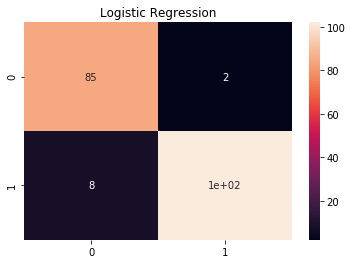

In [27]:
#  Plot the Logistic Regression Confusion Matrix
sns.heatmap(lr_cnf_matrix, annot=True, xticklabels=True, yticklabels=True).set_title('Logistic Regression')

As of now we can see that the first 3 models were better at predicting true negatives (non fraudulent), but need a bit of improvement in accurately detecting frauds.

In [28]:
y_pred = log_reg.predict(X_train)

print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))

Overfitting: 

Recall Score: 0.92
Precision Score: 0.97
F1 Score: 0.94
Accuracy Score: 0.95


__Terms:__ <br>
__True Positives:__ Correctly Classified Fraud Transactions <br>
__False Positives:__ Incorrectly Classified Fraud Transactions <br>
__True Negative:__ Correctly Classified Non-Fraud Transactions <br>
__False Negative:__ Incorrectly Classified Non-Fraud Transactions <br>
__Precision:__ True Positives/(True Positives + False Positives) <br>
__Recall:__ True Positives/(True Positives + False Negatives) <br>
___Precision___ as the name says, says how precise (how sure) is our model in detecting fraud transactions while ___recall___ is the amount of fraud cases our model is able to detect. <br>
__Precision/Recall Tradeoff:__ The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.

In [29]:
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knn_pred = cross_val_predict(knn, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

dtc_pred = cross_val_predict(dtc, X_train, y_train, cv=5)

/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

In [30]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_train, knn_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_train, dtc_pred)

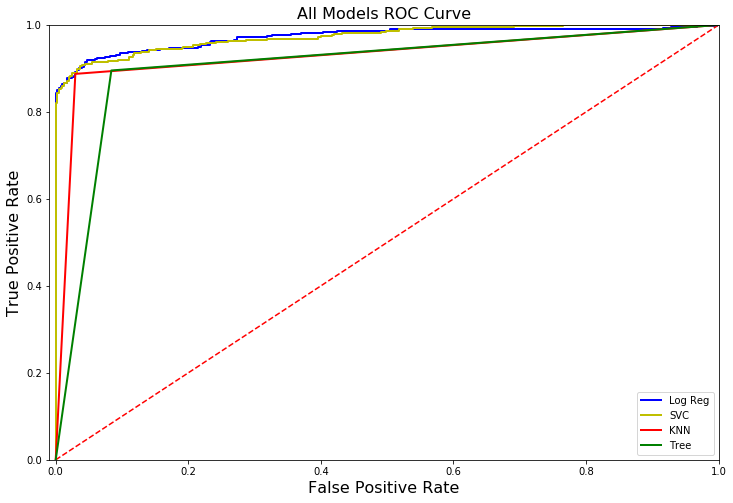

In [31]:
# A visualization of each ROC curve

#plotting a single ROC curve
def model_roc_curve(model_fpr, model_tpr, title,label):
    plt.figure(figsize=(12,8))
    plt.title(title, fontsize=16)
    plt.plot(model_fpr, model_tpr, 'b-', linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    

# All curves
all_title = 'All Models ROC Curve'
log_label = 'Log Reg'
model_roc_curve(log_fpr, log_tpr, all_title, log_label)
plt.plot(svc_fpr, svc_tpr, 'y-', linewidth=2, label='SVC')
plt.plot(knn_fpr, knn_tpr, 'r-', linewidth=2, label='KNN')
plt.plot(dtc_fpr, dtc_tpr, 'g-', linewidth=2, label='Tree')
plt.legend()
plt.show()

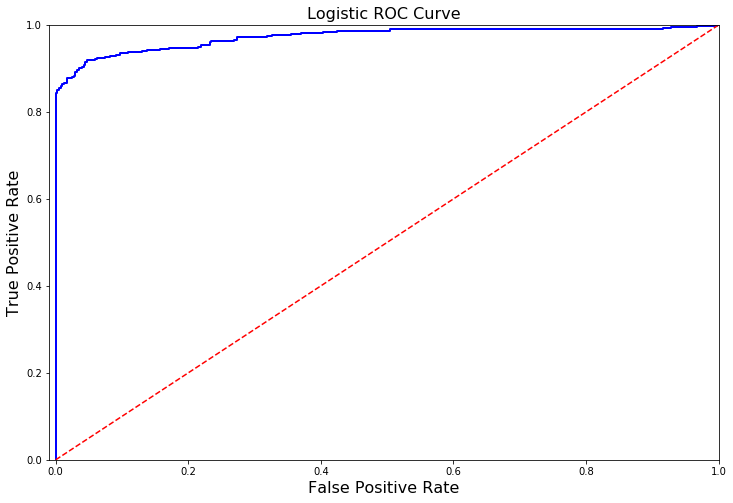

In [32]:
log_title = 'Logistic ROC Curve'  
log_label = 'Log Reg'
model_roc_curve(log_fpr, log_tpr, log_title,log_label)
plt.show()

Though logistic regression, the support vector classifier, and k nearest neighbor have almost the same elbow (where the FP rate starts to increase) the logistic regression and SVC keep the FP rate lower than KNN. <br>

Though the results were good, the TP rate can be better. I first used an undersample to make th fraudulent and non fraudulent classes equal, but it doing so it drastically reduced the size of the dataset, which can lead to overfitting. Since I took data to learn from away first, I'll now implement the SMOTE method (oversampling) to try and get better precision. This will keep all of the original data points, and add synthetic fraudulent points to even out each class, and give me more data to work with. I will also use randomized search instead of gridsearch because we'll be dealing with many more instances while searching for the best hyperparameters.

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# We already have train/test for undersampled data so I'm using 'original' to 
# distinguish and to not overwrite these variables.

# Scale the time and amount columns for the original data
rob_scale = RobustScaler()

df['scaled_amount'] = rob_scale.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scale.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Features and Target data of the entire dataset
feats = df.drop('Class', axis=1)
target = df['Class']
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(feats, target, test_size=0.2, random_state=42)

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

Train: [ 80 590 308 594  35 846 829 591 268 408  84 475 880 931 632 295 258 760
 236 310 977 213  97 818 245 237 957 358 595  46 900 452 534  27 929 472
 757 130 252 550 111 952 206 662 728 981 196  70 798 772  42 375 232 315
 668 385 887 616 596 279 571 139 539 223 515 675 297 429 615 335 922 889
  40 563 276 543 785 482 318 842 219 363 240 319 470 878  51 924 972  67
 439 786 849 120 125 454  45 917 767 188 191  66 192 719  39   8 916 955
 817 626 583 231 891 391 930  85 813 255 298 690 639 624 493 106  19 461
 361 644 906 353 729 291 311 216 407 604 759 164 409 484 131 509 868 613
 471 691 928  48 820 337 982 825 480 140 294 612 674 444  89 802 910 859
 966 499 514 427 215 694 860 850 524 168 163 908 355 137 179 983 170 557
 184 127 425 287 699 150 512  26 795 843 750 970 142 741   0 233 365 314
 491 937 450 575 430 857 737 102 912 941 833 378 688  54 712 722 775  60
 149 617 597 804 589 459 585 769 280 489 180 709 424 901 870 418 435 570
 134 815 305 663 275 217 684 238  73 210 541

In [36]:
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementing SMOTE Technique 
# Cross Validating the right way
# SMOTE happens *during* Cross Validation
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 25)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 25)

---------------------------------------------------------------------------

accuracy: 0.9291139240506329
precision: 0.9672970435223955
recall: 0.8886075949367088
f1: 0.9260576604106017
---------------------------------------------------------------------------


In [37]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       0.90      0.97      0.93        99
       Fraud       0.97      0.89      0.93        98

   micro avg       0.93      0.93      0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [38]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)

# oversampled test/train
smX_train, smy_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [40]:
# Logistic Regression fitted using SMOTE technique 
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(smX_train, smy_train)

# KNN fitted using SMOTE technique
knn_sm = grid_knears.best_estimator_
knn_sm.fit(smX_train, smy_train)
# SVC fitted using SMOTE technique
svc_sm = grid_svc.best_estimator_
svc_sm.fit(smX_train, smy_train)
# DTC fitted using SMOTE technique
dtc_sm = grid_tree.best_estimator_
dtc_sm.fit(smX_train, smy_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
# Model prediction using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)
y_pred_knear = knn_sm.predict(X_test)
y_pred_svc = svc_sm.predict(X_test)
y_pred_tree = dtc_sm.predict(X_test)

# Create SMOTE confusion matrices 
log_sm_cf = confusion_matrix(y_test, y_pred_log_reg)
knn_sm_cf = confusion_matrix(y_test, y_pred_knear)
svc_sm_cf = confusion_matrix(y_test, y_pred_svc)
dtc_sm_cf = confusion_matrix(y_test, y_pred_tree)

Text(0.5,1,'Decision Tree Classifier')

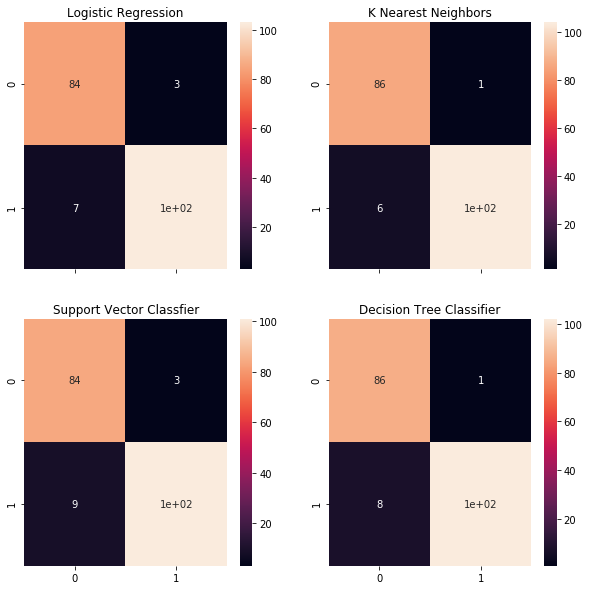

In [42]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.despine(left=True)

#  SMOTE Logistic Regression Confusion Matrix
sns.heatmap(log_sm_cf, annot=True, xticklabels=True, 
            yticklabels=True, ax=axes[0, 0]).set_title('Logistic Regression')

#  SMOTE KNN Confusion Matrix
sns.heatmap(knn_sm_cf, annot=True, xticklabels=True, 
            yticklabels=True, ax=axes[0, 1]).set_title('K Nearest Neighbors')

#  SMOTE SVC Confusion Matrix
sns.heatmap(svc_sm_cf, annot=True, xticklabels=True, 
            yticklabels=True, ax=axes[1, 0]).set_title('Support Vector Classfier')

#  SMOTE DTC Confusion Matrix
sns.heatmap(dtc_sm_cf, annot=True, xticklabels=True, 
            yticklabels=True, ax=axes[1, 1]).set_title('Decision Tree Classifier')

In [44]:
# print metrics (SMOTE fit)
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('K Nearest Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        87
           1       0.97      0.94      0.95       110

   micro avg       0.95      0.95      0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

K Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        87
           1       0.99      0.95      0.97       110

   micro avg       0.96      0.96      0.96       197
   macro avg       0.96      0.97      0.96       197
weighted avg       0.97      0.96      0.96       197

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        87
           1       0.97      0.92      0.94       110

   micro avg       0.94      0.94      0.94       197
   macro avg       0.94      0.94      0.94       197
weigh

In [45]:
cross = cross_val_score(knn_sm, smX_train, smy_train, cv=5)
print(cross)
print("Cross Validation Mean: ", cross.mean())

[0.95 0.94 0.91 0.91 0.94]
Cross Validation Mean:  0.9289516390782213


### Summary:
> I like the results of KNN with regards to predicting frauds correctly. The precesion was at 99%, and recall at 95%, both which are better than lgistic regression. The overall accuracy score is slightly lower in KNN, but when rounded to two decimal places, they're the same. <br>
Overall, oversampling was better on any model, and without doing too much in depth tweaking I was able to get all four models to run exceptionally well.